In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [7]:
data = pd.read_csv('Local_Area_Unemployment_Statistics__Beginning_1976.csv')

In [15]:
# create date column at end of dataframe
# axis = 1 uses columns instead of rows
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis=1)
d = pd.concat((data, pd.DataFrame({'date': dates})), axis=1)
d = d.sort_values(by='date')

In [18]:
# Get different areas
nyc = d[d.Area == 'New York City']
nys = d[d.Area == 'New York State']
buf = d[d.Area == 'Buffalo City']

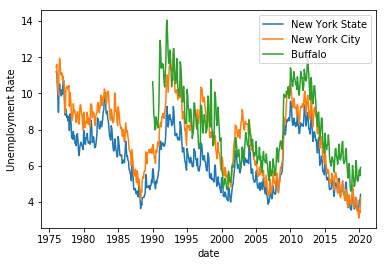

In [19]:
# Create chart for Unemployment Rate
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label='New York State')
plt.plot(nyc.date, 100*nyc['Unemployed']/nyc['Labor Force'], label='New York City')
plt.plot(buf.date, 100*buf['Unemployed']/buf['Labor Force'], label='Buffalo')

# Axis labels
plt.xlabel('date')
plt.ylabel('Unemployment Rate')

# Generate legend
plt.legend()

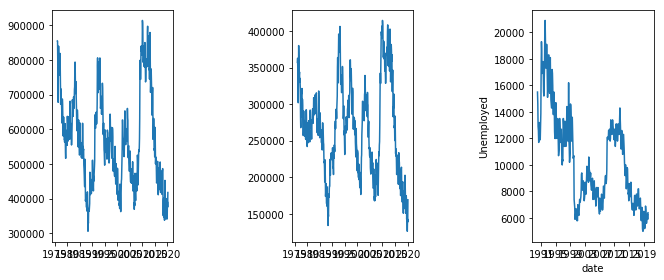

In [25]:
# Create chart for Total Number of Unemployed
# subplot splits the graph into multiple smaller graphs; the number represents:
# number of rows, number of columns, specific column within the subplot
plt.subplot(131)
plt.plot(nys.date, nys['Unemployed'], label='New York State')
plt.subplot(132)
plt.plot(nyc.date, nyc['Unemployed'], label='New York City')
plt.subplot(133)
plt.plot(buf.date, buf['Unemployed'], label='Buffalo')

# Axis labels
plt.xlabel('date')
plt.ylabel('Unemployed')

# automatically adjusts plots for readability
plt.tight_layout()

# Tweaks the dimenions of the graph
plt.gcf().set_size_inches(10, 4)